In [167]:
# Importing Dependencies
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts

## Education Distribution

In [168]:
# Read CSV (occupations)
occupation_file_path = os.path.join('Clean_Data','Clean_Occupations.csv')
occupation_df = pd.read_csv(occupation_file_path, encoding="ISO-8859-1")

# Read CSV file (tuition)
file = os.path.join('Clean_Data', 'Clean_Schools.csv')
schools_df = pd.read_csv(file, encoding="ISO-8859-1")

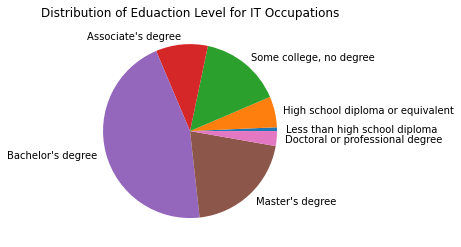

In [169]:
# Create new DataFrame for lists of occupations
ed_level = occupation_df[['Less than high school diploma'
               ,'High school diploma or equivalent'
               ,'Some college, no degree'
               ,"Associate's degree"
               ,"Bachelor's degree"
               ,"Master's degree"
               ,"Doctoral or professional degree"
               ]].sum()

# Find fractions of job titles
ed_level = (ed_level / ed_level.sum() * 100)

# Create pie chart with labels
x = ed_level.plot.pie(y=0, title='Distribution of Eduaction Level for IT Occupations')
x.set_ylabel(None)

# Display pie chart
plt.show()

## Annual Salary

In [170]:
# Display occupation DataFrame
occupation_df.head()

,Code,Occupation,Career Pathway,OnetDescription,Annual Wage - Pct10,Annual Wage - Pct25,Annual Wage - Median,Annual Wage - Pct75,Annual Wage - Pct90,Hourly Wage - Pct10,...,Bachelor's degree,Master's degree,Doctoral or professional degree,EducationCode,EducationTitle,ExperienceCode,ExperienceTitle,TrainingCode,TrainingTitle,EducationOccupationTitle
0,15-2051.01,Business Intelligence Analysts,Information Support and Services,Produce financial and market intelligence by q...,44810,54300,64250,98980,138330,21.55,...,37.5,36.0,14.5,3,Bachelor's degree,3,No work experience,6,No on-the-job training,Data Scientists and Mathematical Science Occup...
1,15-1299.00,"Computer Occupations, All Other",Information Support and Services,All computer occupations not listed separately.,31020,45760,71250,98880,123080,14.91,...,43.6,20.0,2.2,3,Bachelor's degree,3,No work experience,6,No on-the-job training,"Computer Occupations, All Other"
2,15-1299.08,Computer Systems Engineers/Architects,Information Support and Services,Design and develop solutions to complex applic...,31020,45760,71250,98880,123080,14.91,...,43.6,20.0,2.2,3,Bachelor's degree,3,No work experience,6,No on-the-job training,"Computer Occupations, All Other"
3,15-1232.00,Computer User Support Specialists,Information Support and Services,Provide technical assistance to computer users...,30040,36570,46970,61660,79350,14.44,...,37.0,10.7,1.0,6,"Some college, no degree",3,No work experience,6,No on-the-job training,Computer User Support Specialists
4,15-1243.01,Data Warehousing Specialists,Information Support and Services,"Design, model, or implement corporate data war...",45430,63700,90230,116170,134290,21.84,...,46.9,25.2,2.7,3,Bachelor's degree,3,No work experience,6,No on-the-job training,Database Administrators and Architects


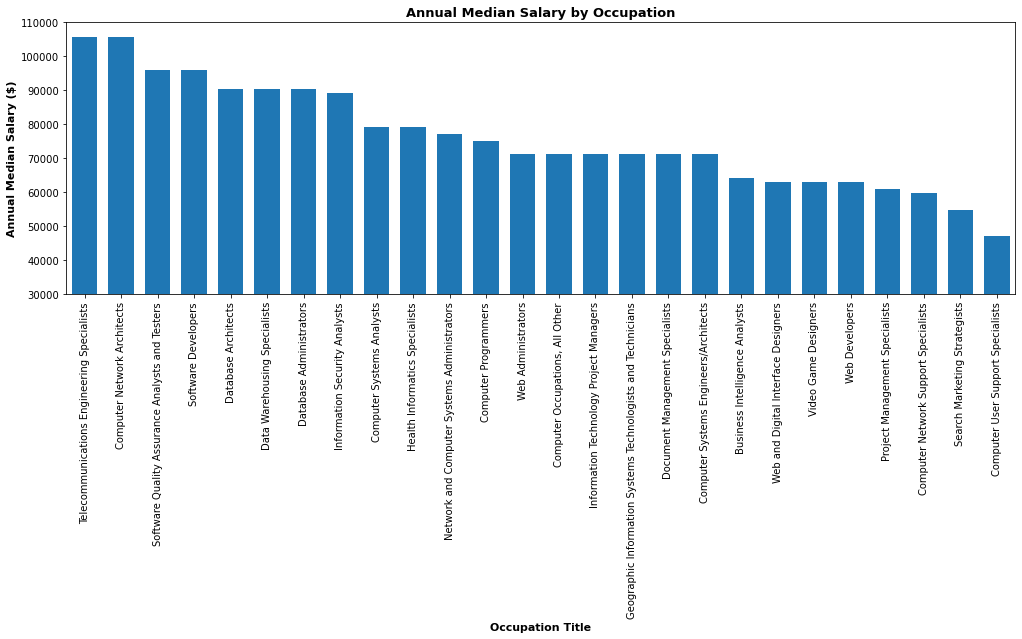

In [171]:
# Sort dataframe
sorted_occupations = occupation_df.sort_values('Annual Wage - Median', ascending = False)

# Create bar plot with x and y values
x_axis = sorted_occupations['Occupation']
y_axis = sorted_occupations['Annual Wage - Median']

# Set Fig size
plt.figure(figsize=(17,5))

# Generate bar plot with matplotlib
plt.bar(x_axis, y_axis, width = 0.70)
plt.xticks(rotation='vertical')

# Set axis labels/limits for plot
plt.title('Annual Median Salary by Occupation', fontsize=13, fontweight='bold')
plt.xlabel('Occupation Title', fontsize=11, fontweight='bold')
plt.ylabel('Annual Median Salary ($)', fontsize=11, fontweight='bold')
plt.xlim(-0.5,25.5)
plt.ylim(30000,110000)

# Display bar plot
plt.show()

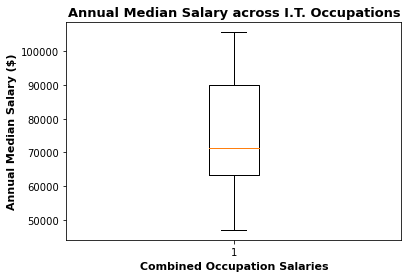

In [172]:
# Create boxplot of all median wages
plt.boxplot(occupation_df['Annual Wage - Median'])

# Create axis labels
plt.title('Annual Median Salary across I.T. Occupations', fontsize=13, fontweight='bold')
plt.xlabel('Combined Occupation Salaries', fontsize=11, fontweight='bold')
plt.ylabel('Annual Median Salary ($)', fontsize=11, fontweight='bold')

# Display boxplot
plt.show()

## Tuition

In [173]:
# Preview DataFrame
schools_df.head()

,School ID,School Name,School State,Degree Type,Program Cost,Annual Cost,Total Cost
0,449506,SABER College,FL,2,19233.0,NaN,19233
1,459310,Future-Tech Institute,FL,1,NaN,11429.0,11429
2,459329,Fred K Marchman Technical College,FL,1,8557.0,NaN,8557
3,482459,DeVry University-Florida,FL,3,NaN,31391.0,125564
4,487393,Florida Career College-West Palm Beach,FL,1,34445.0,NaN,34445


In [174]:
# Create new column and insert into Schools df
schools_df.insert(3,'Degree Desc','')
schools_df.head()

,School ID,School Name,School State,Degree Desc,Degree Type,Program Cost,Annual Cost,Total Cost
0,449506,SABER College,FL,,2,19233.0,NaN,19233
1,459310,Future-Tech Institute,FL,,1,NaN,11429.0,11429
2,459329,Fred K Marchman Technical College,FL,,1,8557.0,NaN,8557
3,482459,DeVry University-Florida,FL,,3,NaN,31391.0,125564
4,487393,Florida Career College-West Palm Beach,FL,,1,34445.0,NaN,34445


In [175]:
# Change 1st column name to school id
schools_df = schools_df.rename(columns= {'Unnamed: 0': 'School ID'})

# Loop through and name degree types
for row in schools_df.index:
    if schools_df['Degree Type'][row] == 1:
        schools_df['Degree Desc'][row] = 'Certificates'
    elif schools_df['Degree Type'][row] == 2:
        schools_df['Degree Desc'][row] = "Associate’s Degrees"
    else:
        schools_df['Degree Desc'][row] = "Bachelor’s Degrees"
        
# Display df with new degree descriptions
schools_df.head()

C:\Users\alexm\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\alexm\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\alexm\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is 

,School ID,School Name,School State,Degree Desc,Degree Type,Program Cost,Annual Cost,Total Cost
0,449506,SABER College,FL,Associate’s Degrees,2,19233.0,NaN,19233
1,459310,Future-Tech Institute,FL,Certificates,1,NaN,11429.0,11429
2,459329,Fred K Marchman Technical College,FL,Certificates,1,8557.0,NaN,8557
3,482459,DeVry University-Florida,FL,Bachelor’s Degrees,3,NaN,31391.0,125564
4,487393,Florida Career College-West Palm Beach,FL,Certificates,1,34445.0,NaN,34445


In [176]:
# Find central dependencies of total cost of tuition
med_cost = schools_df.groupby(['Degree Desc'])['Total Cost'].median()
avg_cost = schools_df.groupby(['Degree Desc'])['Total Cost'].mean()

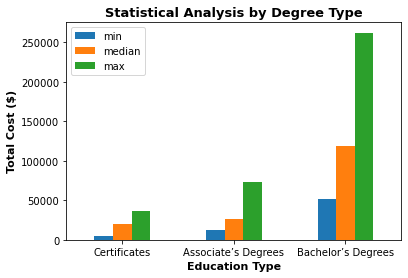

In [177]:
# Create summary df for school tuition
summary_df = schools_df.groupby(['Degree Desc'])['Total Cost'].agg(['min', 'median','max'])

# Sort values
summary_df = summary_df.sort_values('min')                               

# Create bar plot of summary values
summary_df.plot.bar()

# Set axis labels
plt.title('Statistical Analysis by Degree Type', fontsize=13, fontweight='bold')
plt.ylabel('Total Cost ($)', fontsize=11, fontweight='bold')
plt.xlabel('Education Type', fontsize=11, fontweight='bold')
plt.xticks(rotation='horizontal')

# Display bar plot
plt.show()

In [178]:
# Create new df for results
return_df = pd.DataFrame()

# Set counters for rows in loop
occ_row = 0
return_row = 0
degree_cost = 0

# Create list for all education types
education_types = ["Less than high school diploma", "High school diploma or equivalent", 
                   "Some college, no degree", "Associate's degree", 
                   "Bachelor's degree", "Master's degree", "Doctoral or professional degree"]

# Loop through occupation df by job code
for row in occupation_df['Code']:
    for education in education_types:
        
        # Find counts of each degree and set the data type to integers
        degree_count = round(occupation_df[education][occ_row], 0)
        degree_count = int(degree_count)
        
        # Set cost of degree and salary for each education type
        if education == 'Less than high school diploma':
            degree_cost = 0
            salary = 'Annual Wage - Pct10'
        elif education == "High school diploma or equivalent":
            degree_cost = 0
            salary = 'Annual Wage - Pct10'
        elif education == "Some college, no degree":
            degree_cost = summary_df['median']["Certificates"]
            salary = 'Annual Wage - Pct25'
        elif education == "Associate's degree":
            degree_cost = summary_df['median']["Associate’s Degrees"]
            salary = 'Annual Wage - Pct25'
        elif education == "Bachelor's degree":
            degree_cost = summary_df['median']["Bachelor’s Degrees"]
            salary = 'Annual Wage - Median'
        elif education == "Master's degree":
            degree_cost = summary_df['median']["Bachelor’s Degrees"] * 1.5
            salary = 'Annual Wage - Pct75'
        else:
            degree_cost = summary_df['median']["Bachelor’s Degrees"] * 2
            salary = 'Annual Wage - Pct90'
        
        # Create temp df for all gathered data then append to return df 
        for x in range(degree_count):
            df = pd.DataFrame({'Code': [occupation_df['Code'][occ_row]],
                              'Occupation': [occupation_df['Occupation'][occ_row]],
                              'Education': [education],
                              'Annual Salary': [occupation_df[salary][occ_row]],
                              'Degree Cost': [degree_cost], 
                               'ROI (10 Years)': [(occupation_df[salary][occ_row] * 10) - degree_cost]
                              }, index=[return_row])
            return_df = return_df.append(df)
    
    # Loop through row counters
            return_row += 1
    occ_row +=1
    
# Display new df
return_df

,Code,Occupation,Education,Annual Salary,Degree Cost,ROI (10 Years)
0,15-2051.01,Business Intelligence Analysts,High school diploma or equivalent,44810,0.0,448100.0
1,15-2051.01,Business Intelligence Analysts,High school diploma or equivalent,44810,0.0,448100.0
2,15-2051.01,Business Intelligence Analysts,"Some college, no degree",54300,20611.0,522389.0
3,15-2051.01,Business Intelligence Analysts,"Some college, no degree",54300,20611.0,522389.0
4,15-2051.01,Business Intelligence Analysts,"Some college, no degree",54300,20611.0,522389.0
...,...,...,...,...,...,...
2591,15-1254.00,Web Developers,Master's degree,81300,177282.0,635718.0
2592,15-1254.00,Web Developers,Master's degree,81300,177282.0,635718.0
2593,15-1254.00,Web Developers,Master's degree,81300,177282.0,635718.0
2594,15-1254.00,Web Developers,Master's degree,81300,177282.0,635718.0


In [179]:
# Empty lists for value of education
education_values = []

# Find value of ROI for each type of education
for education in education_types:
    df = return_df[return_df['Education'] == education]
    values = df['ROI (10 Years)']
    education_values.append(values)
    
# Display education values
education_values

[100     310200.0
 200     310200.0
 300     300400.0
 500     310200.0
 600     310200.0
 700     310200.0
 800     313900.0
 1098    338700.0
 1198    310200.0
 1298    338700.0
 1398    638200.0
 1498    331700.0
 1797    494400.0
 1896    487600.0
 1997    638200.0
 2097    454700.0
 2496    338700.0
 Name: ROI (10 Years), dtype: float64,
 0       448100.0
 1       448100.0
 101     310200.0
 102     310200.0
 103     310200.0
           ...   
 2497    338700.0
 2498    338700.0
 2499    338700.0
 2500    338700.0
 2501    338700.0
 Name: ROI (10 Years), Length: 146, dtype: float64,
 2       522389.0
 3       522389.0
 4       522389.0
 5       522389.0
 6       522389.0
           ...   
 2512    436889.0
 2513    436889.0
 2514    436889.0
 2515    436889.0
 2516    436889.0
 Name: ROI (10 Years), Length: 393, dtype: float64,
 8       516880.0
 9       516880.0
 10      516880.0
 11      516880.0
 124     431480.0
           ...   
 2522    431380.0
 2523    431380.0
 2524    43

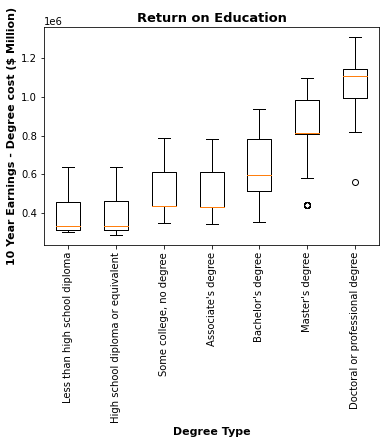

In [181]:
# Create boxplot for different values of education
plt.subplots()
plt.boxplot(education_values, labels=education_types)

# Set axis labels
plt.xticks(rotation='vertical')
plt.title('Return on Education', fontsize=13, fontweight='bold')
plt.ylabel('10 Year Earnings - Degree cost ($ Million)', fontsize=11, fontweight='bold')
plt.xlabel('Degree Type', fontsize=11, fontweight='bold')

# Display box plot
plt.show()